<a href="https://colab.research.google.com/github/sgirald2/TareaGuia3/blob/main/Gu%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [4]:
import pandas as pd

#Se carga el archivo CSV
archivo = "accidents-1.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)


#Se cuentan los valores vacios o nulos, para indentificarlos para la limpieza o estandarizacion
valores_null = df.isna().sum() + (df.eq('').sum())

#Mostrar el resultado del analisis
print("Valores vacios x columna:")
print(valores_null)



Valores vacios x columna:
DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: int64


In [11]:
import pandas as pd

#Se carga el archivo CSV
archivo = "accidents-1.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)

#Se reemplazan los valores vacios por NaN, para facilitar el proceso de imputacion
df.replace('', pd.NA, inplace=True)

#Se imputa la columna ZIP CODE, con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH
df["ZIP CODE"] = df.groupby("BOROUGH")["ZIP CODE"].transform(lambda x: x.fillna(x.mode()[0]))

#Se imputa la columna LATITUDE y LONGITUDE para reemplazar los valores faltantes con la media de las coordenadas dentro de cada municipio
df["LATITUDE"] = df.groupby("BOROUGH")["LATITUDE"].transform(lambda x: x.fillna(x.astype(float).mean()))
df["LONGITUDE"] = df.groupby("BOROUGH")["LONGITUDE"].transform(lambda x: x.fillna(x.astype(float).mean()))

#Se imputa la columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía.
df["ON STREET NAME"] = df["ON STREET NAME"].fillna("UNKNOWN")

#Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified".
factores = [col for col in df.columns if "CONTRIBUTING FACTOR VEHICLE" in col]
df[factores] = df[factores].fillna("Unspecified")

#Para las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown".
vehiculos = [col for col in df.columns if "VEHICLE TYPE CODE" in col]
df[vehiculos] = df[vehiculos].fillna("Unknown")

#Se procede a guardar el arhcivo para ser usado en los siguientes pasos
df.to_csv("archivo_accidents_limpio.csv", sep=";", index=False)


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [X] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [X] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [X] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [X] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


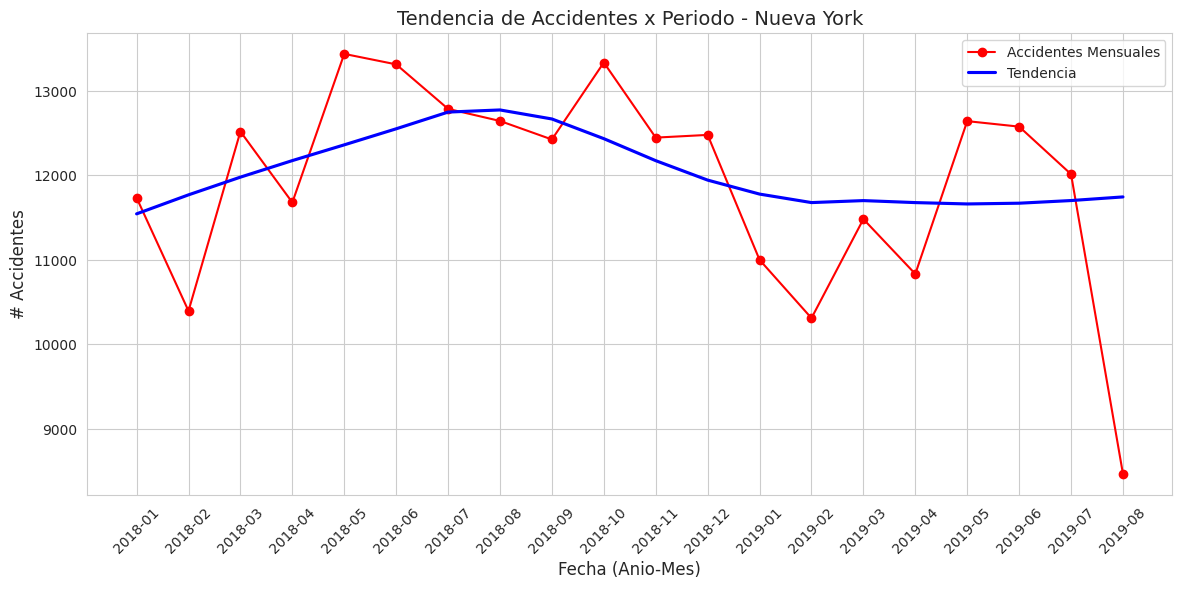

El numero de incidentes a disminuido o se ha mantenido en el ultimo anio y medio


In [17]:
#Se importan la librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se carga el archivo CSV
archivo= "archivo_accidents_limpio.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)

#Se convierte la columna DATE a formato datetime
df["DATE"] = pd.to_datetime(df["DATE"], format="%m/%d/%Y")

#Se agrupa x mes
df["Year-Month"] = df["DATE"].dt.to_period("M")
accidentesxmes = df.groupby("Year-Month").size().reset_index(name="Accidents")

#Se convierte period a string para graficar
accidentesxmes["Year-Month"] = accidentesxmes["Year-Month"].astype(str)

#Se crea un indice para la regresion
accidentesxmes["Index"] = range(len(accidentesxmes))

#Se crea la figura
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

#Se grafica la linea que une los puntos
plt.plot(accidentesxmes["Year-Month"], accidentesxmes["Accidents"], marker="o", linestyle="-", color="red", label="Accidentes Mensuales")

#Se grafica la linea de tendencia
sns.regplot(x="Index", y="Accidents", data=accidentesxmes, scatter=False, lowess=True, color="blue", label="Tendencia")

#Se personaliza el grafico
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Fecha (Anio-Mes)", fontsize=12)
plt.ylabel("# Accidentes", fontsize=12)
plt.title("Tendencia de Accidentes x Periodo - Nueva York", fontsize=14)
plt.legend()
plt.show()

#Se evalua la tendencia de el ultimo anio y medio
ult_anioymedio = accidentesxmes[-18:]
trend_increase = ult_anioymedio["Accidents"].iloc[-1] > ult_anioymedio["Accidents"].iloc[0]
if trend_increase:
    print("El numero de incidentes a aumentado en el ultimo anio y medio")
else:
    print("El numero de incidentes a disminuido o se ha mantenido en el ultimo anio y medio")

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

**Los meses con menos numero de accidentes son Febrero, Julio y Agosto. Puede deberse a las vacaciones de verano (Julio y Agosto) las personas viajan y hay buen clima para transitar. En Febrero, por el invierno, las personas estan en sus casas y hay menos vehiculos transitando**

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

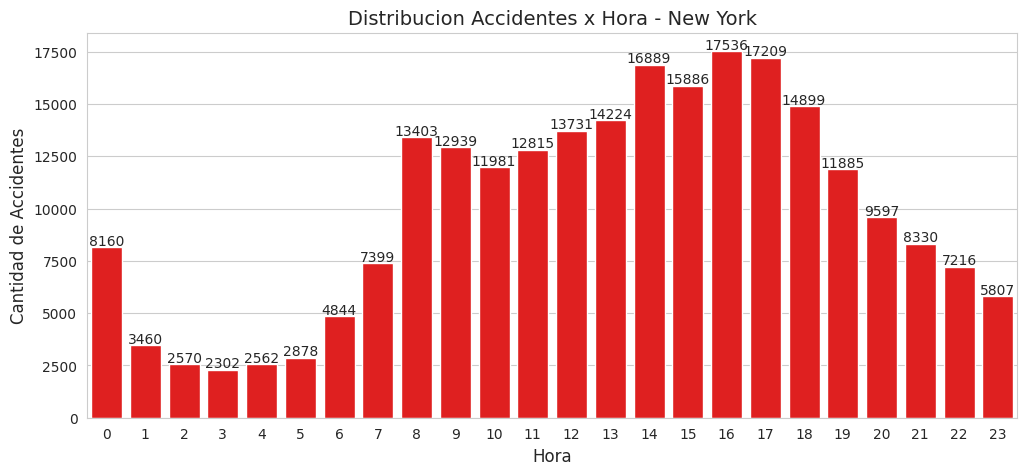

In [30]:
#Se importan la librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se carga el archivo CSV
archivo = "archivo_accidents_limpio.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)

#Se extrae la hora de la columna TIME
df["HOUR"] = pd.to_datetime(df["TIME"], format="%H:%M").dt.hour

#Se agrupan x hora y se cuentan los accidentes
accidentesxhora = df.groupby("HOUR").size().reset_index(name="count")

#Se crea el grafico de barras
plt.figure(figsize=(12, 5))
sns.barplot(x="HOUR", y="count", data=accidentesxhora, color="red")

#Se agregan los accidentes a cada hora para visualizar mejor el grafico
for index, row in accidentesxhora.iterrows():
    plt.text(row["HOUR"], row["count"] + 100, str(row["count"]), ha="center", fontsize=10)

#Se perzonaliza el grafico
plt.xlabel("Hora", fontsize=12)
plt.ylabel("Cantidad de Accidentes", fontsize=12)
plt.title("Distribucion Accidentes x Hora - New York", fontsize=14)
plt.xticks(ticks=range(24))

#Se muestra el grafico generado
plt.show()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**Aunque este analisis proporciona una vision general de las horas con mayor numero de accidentes, este analisis obvia factores claves como las diferencias entre dias laborables, festivos y fines de semana, las estaciones del anio y la diferencia estre ciudades, ya que cada una puede presentar condiciones de trafico y movilidad muy distintos, que pueden influir en el resultados y en la implementacion de las politicas**

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

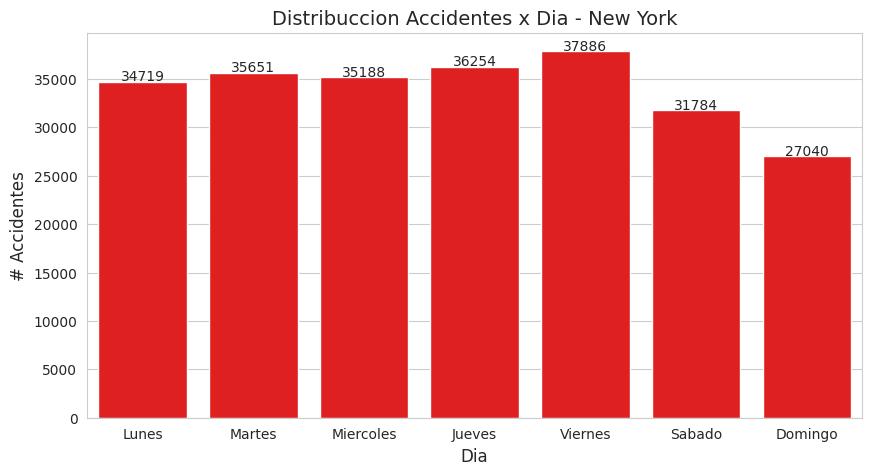

In [31]:
#Se importan la librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se carga el archivo CSV
archivo = "archivo_accidents_limpio.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)

#Se convierte la columna DATE a datetime y se extrae el numero de la semana
df["DATE"] = pd.to_datetime(df["DATE"], format="%m/%d/%Y")
df["WEEKDAY"] = df["DATE"].dt.weekday

#Se cuentan los accidentes x dia de la semana
accidentesxdia = df.groupby("WEEKDAY").size().reset_index(name="count")

#Se le asignan los dias de la semana acorde a la extraccion realizada anteriormente
asignaciondias = {0: "Lunes", 1: "Martes", 2: "Miercoles", 3: "Jueves", 4: "Viernes", 5: "Sabado", 6: "Domingo"}
accidentesxdia["WEEKDAY"] = accidentesxdia["WEEKDAY"].map(asignaciondias)

#Se ordenan los dias de la semana para visualizarlos en el eje x
orderdias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
accidentesxdia = accidentesxdia.set_index("WEEKDAY").reindex(orderdias).reset_index()

#S crea el grafico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x="WEEKDAY", y="count", data=accidentesxdia, color="red")

#Se le agregan el valor de los accidentes a cada columna del dia para visualizar mejor el grafico
for index, row in accidentesxdia.iterrows():
    plt.text(index, row["count"] + 100, str(row["count"]), ha="center", fontsize=10)

#Se perosonaliza el grafico
plt.xlabel("Dia", fontsize=12)
plt.ylabel("# Accidentes", fontsize=12)
plt.title("Distribuccion Accidentes x Dia - New York", fontsize=14)

#Se muestra el grafico
plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

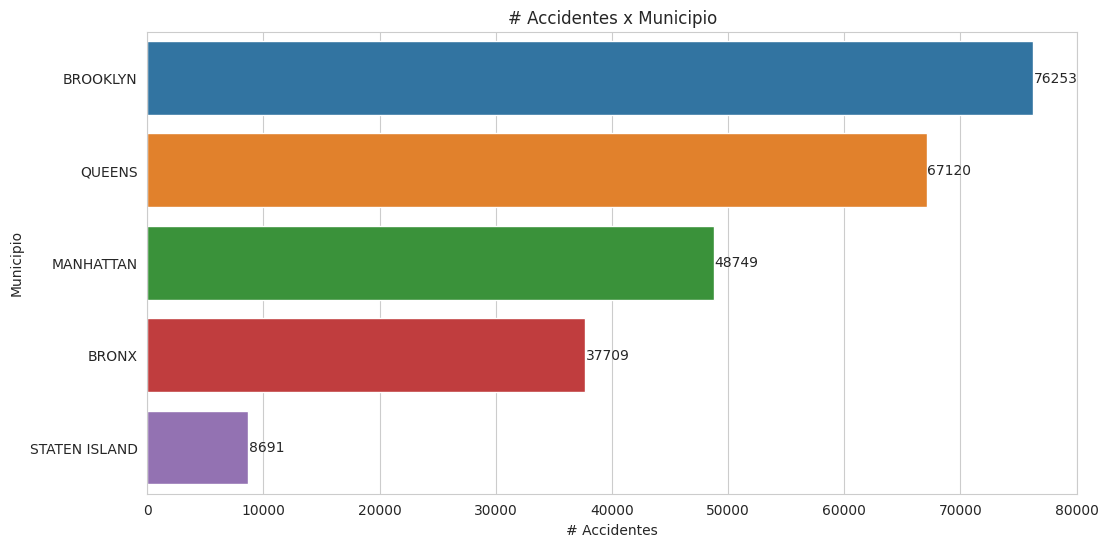

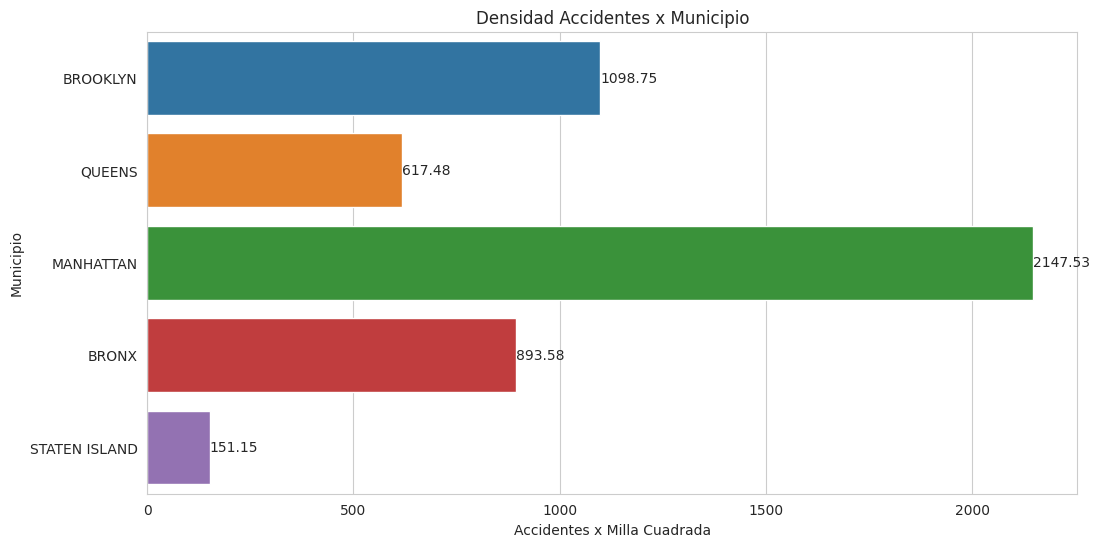

In [109]:
#Se importan la librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se carga el archivo CSV
archivo = "archivo_accidents_limpio.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)

#Se crea diccionario con las millas cuadradas x municipio
area = {
    "BRONX": 42.2,
    "BROOKLYN": 69.4,
    "MANHATTAN": 22.7,
    "QUEENS": 108.7,
    "STATEN ISLAND": 57.5
}

#Se contabiliza el numero total de accidentes por municipio
accidentesxmunicipio = df["BOROUGH"].value_counts().reset_index()
accidentesxmunicipio.columns = ["BOROUGH", "TotalAccidentes"]

#Se agrega la informacion correspondiente al area desde el diccionario anteriormente creado
area_millas = pd.DataFrame(list(area.items()), columns=["BOROUGH", "AreaMillasCuadradas"])
accidentesxmunicipio = accidentesxmunicipio.merge(area_millas, on="BOROUGH", how="left")

#Se calcula la densidad de accidentes millas cuadradas
accidentesxmunicipio["DensidadAccidentes"] = accidentesxmunicipio["TotalAccidentes"] / accidentesxmunicipio["AreaMillasCuadradas"]

#Se grafica el numero total de accidentes por municipio
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=accidentesxmunicipio, x="TotalAccidentes", y="BOROUGH", hue="BOROUGH", dodge=False, legend=False)

#Se agregan los valores a cada barra y se personaliza el grafico
for index, value in enumerate(accidentesxmunicipio["TotalAccidentes"]):
    ax.text(value + 50, index, str(int(value)), va='center', fontsize=10)

#Se colocan los titulos y se muestra el grafico
plt.xlabel("# Accidentes")
plt.ylabel("Municipio")
plt.title("# Accidentes x Municipio")
plt.show()

#Se grafica la densidas de accidentes por municipio
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=accidentesxmunicipio, x="DensidadAccidentes", y="BOROUGH", hue="BOROUGH", dodge=False, legend=False)

#Se agregan los valores a cada barra y se personaliza el grafico
for index, value in enumerate(accidentesxmunicipio["DensidadAccidentes"]):
    ax.text(value + 0.1, index, str(round(value, 2)), va='center', fontsize=10)

#Se colocan los titulos y se muestra el grafico
plt.xlabel("Accidentes x Milla Cuadrada")
plt.ylabel("Municipio")
plt.title("Densidad Accidentes x Municipio")
plt.show()



Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

**Se puden concluir varias cosas: Manhattan tiene la mayor densidad de accidentes, Brooklyn tiene el mayor numero total de accidentes y Queens tiene una densidad de accidentes relativamente baja**

**Aunque Brooklyn y Queens tienen un numero alto de accidentes en relacion a los otros municipios, cuando se mira por milla cuadrada, la cosa cambia Manhattan encabezaria la lista y luego Brooklyn**

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

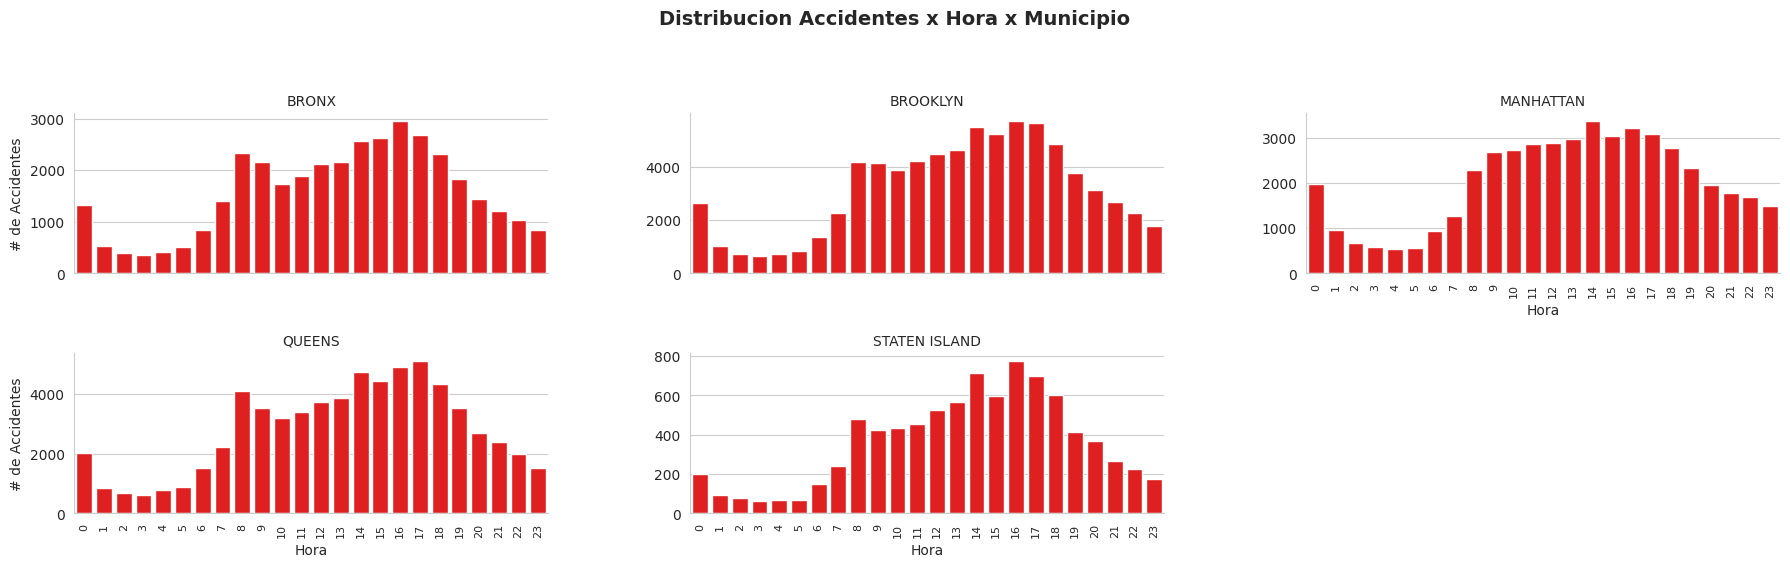


Horas con mas accidentalidad x municipio:
BRONX, 16h.
BROOKLYN, 16h.
QUEENS, 17h.
MANHATTAN, 14h.
STATEN ISLAND, 16h.


In [69]:
#Se importan la librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se carga el archivo CSV
archivo = "archivo_accidents_limpio.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)

#Se convierte la columna TIME a datetime y se extrae la hora
df["HOUR"] = pd.to_datetime(df["TIME"], format="%H:%M").dt.hour.astype(int)

#Se cuentan los accidentes por hora y municipio
accidentesxhoraagg = df.groupby(["BOROUGH", "HOUR"]).size().reset_index(name="count")

#Se crea la cuadricula de graficos
g = sns.FacetGrid(accidentesxhoraagg, col="BOROUGH", col_wrap=3, sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="HOUR", y="count", color="red")

#Se ajusta el eje x para cada grafico
for ax in g.axes.flatten():
    ax.set_xticks(range(24))
    ax.set_xticklabels(range(24), rotation=90, fontsize=8)
    ax.set_xlim(-0.5, 23.5)

#Se agregan los titulos y las etiquetas a los graficos
g.set_axis_labels("Hora", "# de Accidentes")
g.set_titles("{col_name}")

#Se ajusta el espaciado para evitar que se junten las horas y se integra el titulo general del graficos
plt.subplots_adjust(top=0.85, bottom=0.35, hspace=0.5, wspace=0.3)
plt.suptitle("Distribucion Accidentes x Hora x Municipio", fontsize=14, fontweight="bold")

#Se muestra el grafico
plt.show()

#Se genera el resumen final con las horas de mayor accidentalidad x municipio
incidenciaxmunicipio = {}
for borough in df["BOROUGH"].unique():
    subset = accidentesxhoraagg[accidentesxhoraagg["BOROUGH"] == borough]
    if not subset.empty:
        accidentesmax = subset["count"].max()
        porhora = subset[subset["count"] ==  accidentesmax ]["HOUR"].tolist()
        incidenciaxmunicipio[borough] = porhora

#Se imprime el resumen final
print("\nHoras con mas accidentalidad x municipio:")
for borough, hours in incidenciaxmunicipio.items():
    stringhoras = ", ".join(map(str, hours))
    print(f"{borough}, {stringhoras}h.")


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

**Si, los graficos muestran una variacion de los numeros de accidentes en diferentes momentos del dia. Definitivamente se deberia concentrar en diferentes momentos por cada municipio**

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

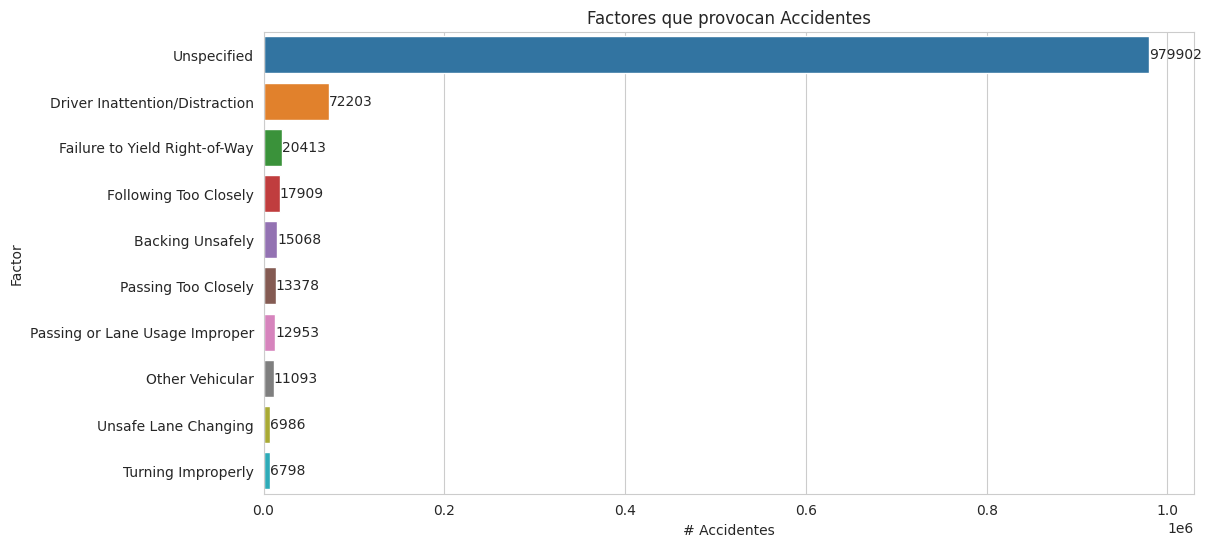

Los principales factores que provocan la mayoría de los accidentes son:
1. Unspecified - 979902 accidentes
2. Driver Inattention/Distraction - 72203 accidentes
3. Failure to Yield Right-of-Way - 20413 accidentes
4. Following Too Closely - 17909 accidentes
5. Backing Unsafely - 15068 accidentes


In [86]:
#Se importan la librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se carga el archivo CSV
archivo = "archivo_accidents_limpio.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)

#Se seleccionan las columnas con los factores que provocan los accidentes
factores = [
    "CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2",
    "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5"
]

#Se concatenan las columnas
factoresagrupados = pd.concat([df[col] for col in factores], ignore_index=True).dropna()

#Se cuentan las veces que ocurre cada accidente por factor
factorescontados = factoresagrupados.value_counts().reset_index()
factorescontados.columns = ["Factor", "Frecuencia"]
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=factorescontados.head(10), x="Frecuencia", y="Factor", hue="Factor", dodge=False, legend=False)

#Se agrega el valor del # de accidentes a cada barra para mayor visualización
for index, value in enumerate(factorescontados["Frecuencia"].head(10)):
    ax.text(value + 10, index, str(value), va='center', fontsize=10)

#Se colocan las etiquetas y los títulos
plt.xlabel("# Accidentes")
plt.ylabel("Factor")
plt.title("Factores que provocan Accidentes")

#Se muestra el gráfico
plt.show()

#Se imprime la respuesta sobre los factores que provocan la mayoría de los accidentes
print("Los principales factores que provocan la mayoria de los accidentes son:")
for i, row in factorescontados.head(5).iterrows():
    print(f"{i+1}. {row['Factor']} - {row['Frecuencia']} accidentes")

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

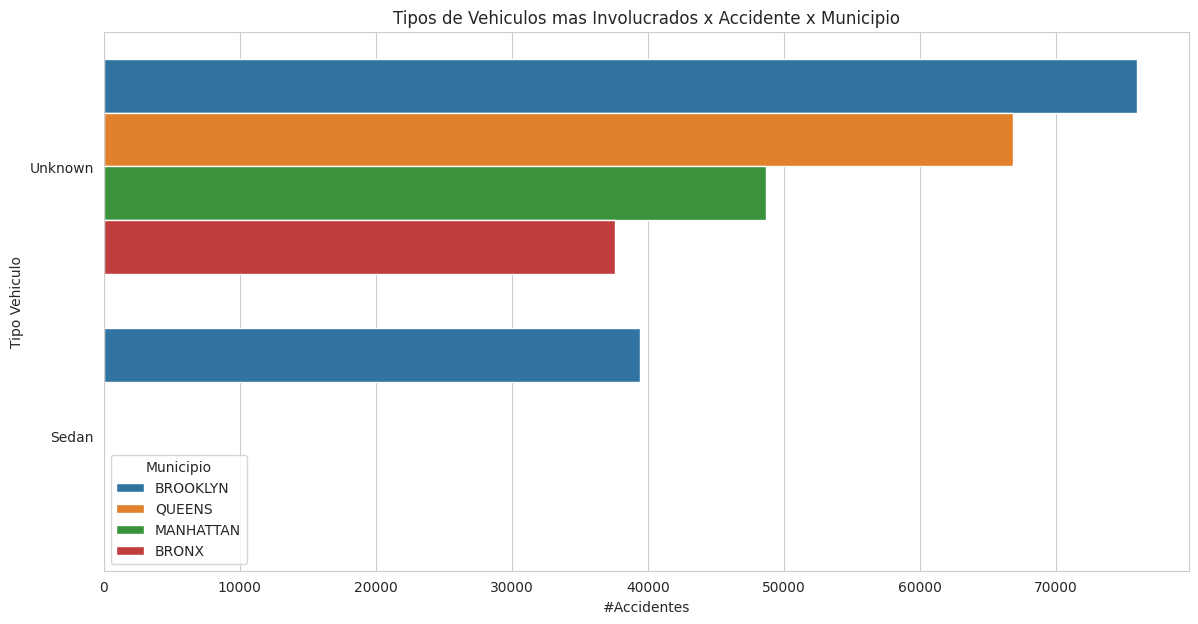

Los tipos de vehiculos mas involucrados en accidentes por municipio son:

Municipio: BRONX
233. Unknown - 37593 accidentes
182. Sedan - 19652 accidentes
186. Station Wagon/Sport Utility Vehicle - 15434 accidentes
147. PASSENGER VEHICLE - 4941 accidentes
175. SPORT UTILITY / STATION WAGON - 3751 accidentes

Municipio: BROOKLYN
562. Unknown - 75959 accidentes
512. Sedan - 39459 accidentes
520. Station Wagon/Sport Utility Vehicle - 32262 accidentes
461. PASSENGER VEHICLE - 10177 accidentes
500. SPORT UTILITY / STATION WAGON - 8099 accidentes

Municipio: MANHATTAN
914. Unknown - 48678 accidentes
869. Sedan - 20727 accidentes
874. Station Wagon/Sport Utility Vehicle - 16432 accidentes
892. Taxi - 8989 accidentes
826. PASSENGER VEHICLE - 5627 accidentes

Municipio: QUEENS
1209. Unknown - 66870 accidentes
1165. Sedan - 35103 accidentes
1169. Station Wagon/Sport Utility Vehicle - 31647 accidentes
1131. PASSENGER VEHICLE - 8952 accidentes
1158. SPORT UTILITY / STATION WAGON - 7890 accidentes

M

In [91]:
#Se importan la librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Se carga el archivo CSV
archivo = "archivo_accidents_limpio.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)


#Se seleccionan las columnas para hacer las relaciones
municipio = "BOROUGH"
id_accidente = "COLLISION_ID"
vehiculos = [
    "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3",
    "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"
]

#Se agrupan los vehiculos por municipio y accidente, evitando duplicados dentro del mismo accidente
vehiculosagg = df.melt(id_vars=[id_accidente, municipio],
                              value_vars=vehiculos,
                              var_name="Vehiculo_Index",
                              value_name="Tipo_Vehiculo")

#Se eliminan los duplicados dentro del mismo accidente
vehiculosagg.drop_duplicates(subset=[id_accidente, municipio, "Tipo_Vehiculo"], inplace=True)

#Se cuentan los vehiculos x miunicipio
vehiculos_contados = vehiculosagg.groupby(["BOROUGH", "Tipo_Vehiculo"]).size().reset_index(name="Frecuencia")

#Se hace un top 5 con los vehiculos mas accidnetados
plt.figure(figsize=(14, 7))
sns.barplot(data=vehiculos_contados.sort_values("Frecuencia", ascending=False).head(5),
            x="Frecuencia", y="Tipo_Vehiculo", hue="BOROUGH", dodge=True)

#Se asignan las etiquetas y los titulos
plt.xlabel("#Accidentes")
plt.ylabel("Tipo Vehiculo")
plt.title("Tipos de Vehiculos mas Involucrados x Accidente x Municipio")
plt.legend(title="Municipio")
plt.show()

#Se imprime la respuesta a los tipos de vehículos mas involucrados en accidentes por municipio
print("Los tipos de vehiculos mas involucrados en accidentes por municipio son:")
for borough, group in vehiculos_contados.groupby("BOROUGH"):
    print(f"\nMunicipio: {borough}")
    for i, row in group.sort_values("Frecuencia", ascending=False).head(5).iterrows():
        print(f"{i+1}. {row['Tipo_Vehiculo']} - {row['Frecuencia']} accidentes")


### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [X] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

**Escogeria la primera opcion ya que permite entender los factores que han cambiado y han llevado al aumento de accidentes en 2019. Es funcional porque no depende de datos adicionales, lo que seria mejor para un analisis directo con la informacion que hay a la mano**

---



### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

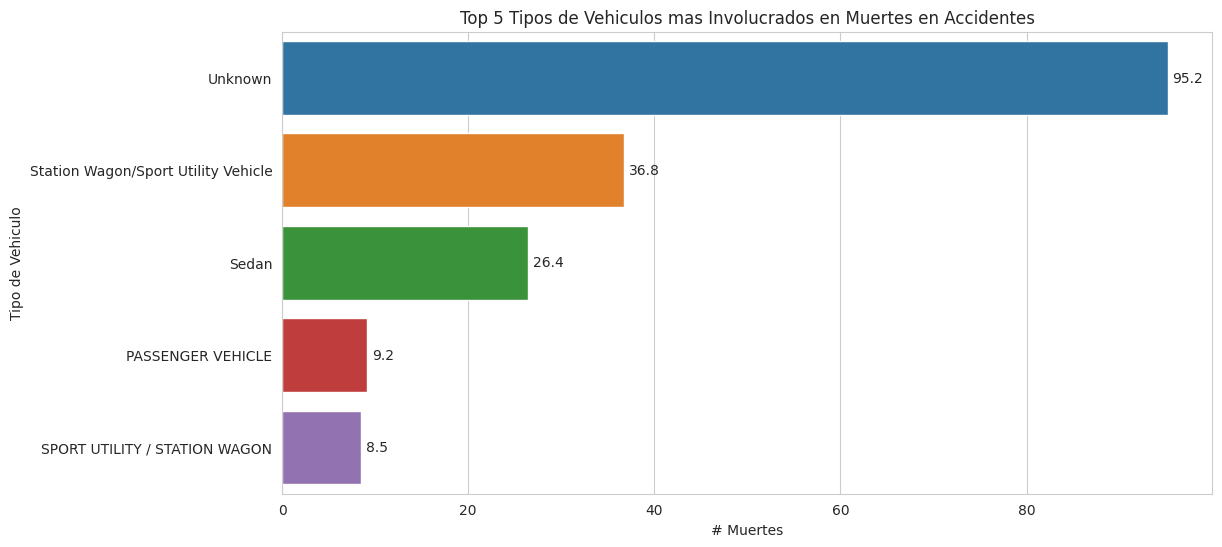

In [103]:
#Se importan la librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se carga el archivo CSV
archivo = "archivo_accidents_limpio.csv"
df = pd.read_csv(archivo, sep=';', dtype=str)

#Se convierten las columnas asociadas a la muerte a numerico
muertes = ["NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST KILLED"]
df[muertes] = df[muertes].apply(pd.to_numeric, errors='coerce').fillna(0)

#Se calcula el total de muertes
df["TOTAL_DEATHS"] = df[muertes].sum(axis=1)

#Se seleccionan las columnas con los tipos de vehiculos
vehiculos = ["VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3",
                  "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"]

#Se tranforman los datos para asignar las muertes a los vehiculos
vehiculosmuertes = df.melt(id_vars=["COLLISION_ID", "TOTAL_DEATHS"], value_vars=vehiculos,
                               var_name="VehiculoIndex", value_name="TipoVehiculo")

#Se evita contar el mismo vehiculo en el mismo accidente
vehiculosmuertes.drop_duplicates(subset=["COLLISION_ID", "TipoVehiculo"], inplace=True)

#Se cuenta el numero de vehiculos asociados al accidente
vehiculosmuertes["TotalVehiculosAccidente"] = vehiculosmuertes.groupby("COLLISION_ID")[
    "TipoVehiculo"].transform("count")

#Se distribuyen las muertes a cada vehiculo
vehiculosmuertes["MuertesporVehiculo"] = vehiculosmuertes["TOTAL_DEATHS"] / vehiculosmuertes[
    "TotalVehiculosAccidente"]

#Se suman las muertes por tipo de vehiculo
vehiculos_muertes_total = vehiculosmuertes.groupby("TipoVehiculo")["MuertesporVehiculo"].sum().reset_index()

#Se ordenan por numero de muertes y se selecciona el top 5
vehiculos_top5 = vehiculos_muertes_total.sort_values("MuertesporVehiculo", ascending=False).head(5)

#Se crea el grafico y se agregan los valores
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=vehiculos_top5, x="MuertesporVehiculo", y="TipoVehiculo", hue="TipoVehiculo", dodge=False, legend=False)
for index, value in enumerate(vehiculos_top5["MuertesporVehiculo"]):
    ax.text(value + 0.5, index, str(round(value, 1)), va='center', fontsize=10)

#Se colocan las eqtiquetas y los titulos
plt.xlabel("# Muertes")
plt.ylabel("Tipo de Vehiculo")
plt.title("Top 5 Tipos de Vehiculos mas Involucrados en Muertes en Accidentes")
plt.show()